In [14]:
pip install requests pandas nflreadpy pyarrow seaborn matplotlib


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import requests
import nflreadpy as nfl
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
API_KEY = "994b1ddeab26ca7bbf66aae54f676718"
SPORT = "americanfootball_nfl"
REGION = "us"
MARKET = "h2h,spreads,totals"
ODDS_FORMAT = "decimal"

url = f"https://api.the-odds-api.com/v4/sports/{SPORT}/odds/"

params = {
    "apiKey": API_KEY,
    "sport" : SPORT,
    "regions" : REGION,
    "markets" : MARKET,
    "oddsFormat" : ODDS_FORMAT
}

response = requests.get(url, params=params)

if response.status_code == 200:
    games = response.json()
else:
    print("Error:", response.status_code, response.text)

rows = []
for game in games:
    game_id = game["id"]
    time = game["commence_time"]
    home = game["home_team"]
    away = game["away_team"]
    matchup = f"{away} @ {home}"

    for bookmaker in game["bookmakers"]:
        book = bookmaker["title"]
        for market in bookmaker["markets"]:
            market_type = market["key"]
            for outcome in market["outcomes"]:
                rows.append({
                        "game_id": game_id,
                        "commence_time": time,
                        "matchup": matchup,
                        "home_team": home,
                        "away_team": away,
                        "bookmaker": book,
                        "market": market_type,
                        "outcome": outcome["name"],
                        "price": outcome["price"],
                        "point": outcome.get("point")
                })

df = pd.DataFrame(rows)

In [17]:
df

,game_id,commence_time,matchup,home_team,away_team,bookmaker,market,outcome,price,point
0,4963bff460a5f26cab46a8e5ea6db148,2025-10-12T20:06:00Z,Tennessee Titans @ Las Vegas Raiders,Las Vegas Raiders,Tennessee Titans,DraftKings,h2h,Las Vegas Raiders,1.00,NaN
1,4963bff460a5f26cab46a8e5ea6db148,2025-10-12T20:06:00Z,Tennessee Titans @ Las Vegas Raiders,Las Vegas Raiders,Tennessee Titans,DraftKings,h2h,Tennessee Titans,61.00,NaN
2,4963bff460a5f26cab46a8e5ea6db148,2025-10-12T20:06:00Z,Tennessee Titans @ Las Vegas Raiders,Las Vegas Raiders,Tennessee Titans,Caesars,spreads,Las Vegas Raiders,1.72,-9.5
3,4963bff460a5f26cab46a8e5ea6db148,2025-10-12T20:06:00Z,Tennessee Titans @ Las Vegas Raiders,Las Vegas Raiders,Tennessee Titans,Caesars,spreads,Tennessee Titans,2.00,9.5
4,4963bff460a5f26cab46a8e5ea6db148,2025-10-12T20:06:00Z,Tennessee Titans @ Las Vegas Raiders,Las Vegas Raiders,Tennessee Titans,FanDuel,spreads,Las Vegas Raiders,1.71,-9.5
...,...,...,...,...,...,...,...,...,...,...
645,7ca953ab786f70b22cabbe4946d330fa,2025-10-21T02:01:00Z,Houston Texans @ Seattle Seahawks,Seattle Seahawks,Houston Texans,BetRivers,h2h,Seattle Seahawks,1.65,NaN
646,7ca953ab786f70b22cabbe4946d330fa,2025-10-21T02:01:00Z,Houston Texans @ Seattle Seahawks,Seattle Seahawks,Houston Texans,BetRivers,spreads,Houston Texans,1.85,3.0
647,7ca953ab786f70b22cabbe4946d330fa,2025-10-21T02:01:00Z,Houston Texans @ Seattle Seahawks,Seattle Seahawks,Houston Texans,BetRivers,spreads,Seattle Seahawks,1.93,-3.0
648,7ca953ab786f70b22cabbe4946d330fa,2025-10-21T02:01:00Z,Houston Texans @ Seattle Seahawks,Seattle Seahawks,Houston Texans,BetRivers,totals,Over,1.89,42.0


In [18]:
SPORT = "americanfootball_nfl"
REGION = "us"
MARKET = "h2h,spreads,totals"
ODDS_FORMAT = "decimal"
DATE = "2021-10-18T12:00:00Z"

hist_url = f"https://api.the-odds-api.com/v4/historical/sports/{SPORT}/odds/"

params = {
    "apiKey": API_KEY,
    "regions": REGION,
    "markets": MARKET,
    "oddsFormat": ODDS_FORMAT,
    "date": DATE
}

response = requests.get(hist_url, params=params)

if response.status_code == 200:
    data = response.json()

    # snapshot info
    snapshot_info = {
        "timestamp": data.get("timestamp"),
        "previous_timestamp": data.get("previous_timestamp"),
        "next_timestamp": data.get("next_timestamp")
    }
    # print("Snapshot Info:", snapshot_info, "\n")

    games = data.get("data", [])  # odds data lives inside 'data'

    rows = []
    for game in games:
        game_id = game["id"]
        time = game["commence_time"]
        home = game["home_team"]
        away = game["away_team"]
        matchup = f"{away} @ {home}"

        for bookmaker in game["bookmakers"]:
            book = bookmaker["title"]
            for market in bookmaker["markets"]:
                market_type = market["key"]
                for outcome in market["outcomes"]:
                    rows.append({
                        "snapshot_time": snapshot_info["timestamp"],
                        "game_id": game_id,
                        "commence_time": time,
                        "matchup": matchup,
                        "home_team": home,
                        "away_team": away,
                        "bookmaker": book,
                        "market": market_type,
                        "outcome": outcome["name"],
                        "price": outcome["price"],
                        "point": outcome.get("point")
                    })

    df_hist = pd.DataFrame(rows)

else:
    print("Error:", response.status_code, response.text)

In [19]:
df_hist

,snapshot_time,game_id,commence_time,matchup,home_team,away_team,bookmaker,market,outcome,price,point
0,2021-10-18T11:55:00Z,4edd5ce090a3ec6192053b10d27b87b0,2021-10-19T00:15:00Z,Buffalo Bills @ Tennessee Titans,Tennessee Titans,Buffalo Bills,DraftKings,spreads,Buffalo Bills,1.95,-6.5
1,2021-10-18T11:55:00Z,4edd5ce090a3ec6192053b10d27b87b0,2021-10-19T00:15:00Z,Buffalo Bills @ Tennessee Titans,Tennessee Titans,Buffalo Bills,DraftKings,spreads,Tennessee Titans,1.87,6.5
2,2021-10-18T11:55:00Z,4edd5ce090a3ec6192053b10d27b87b0,2021-10-19T00:15:00Z,Buffalo Bills @ Tennessee Titans,Tennessee Titans,Buffalo Bills,DraftKings,totals,Over,1.91,53.0
3,2021-10-18T11:55:00Z,4edd5ce090a3ec6192053b10d27b87b0,2021-10-19T00:15:00Z,Buffalo Bills @ Tennessee Titans,Tennessee Titans,Buffalo Bills,DraftKings,totals,Under,1.91,53.0
4,2021-10-18T11:55:00Z,4edd5ce090a3ec6192053b10d27b87b0,2021-10-19T00:15:00Z,Buffalo Bills @ Tennessee Titans,Tennessee Titans,Buffalo Bills,DraftKings,h2h,Buffalo Bills,1.34,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1195,2021-10-18T11:55:00Z,d5f8ac38f6cc5273698ecf837f42fff5,2021-10-24T20:25:00Z,Houston Texans @ Arizona Cardinals,Arizona Cardinals,Houston Texans,GTbets,h2h,Houston Texans,10.20,NaN
1196,2021-10-18T11:55:00Z,d5f8ac38f6cc5273698ecf837f42fff5,2021-10-24T20:25:00Z,Houston Texans @ Arizona Cardinals,Arizona Cardinals,Houston Texans,Betfair,h2h_lay,Arizona Cardinals,1.12,NaN
1197,2021-10-18T11:55:00Z,d5f8ac38f6cc5273698ecf837f42fff5,2021-10-24T20:25:00Z,Houston Texans @ Arizona Cardinals,Arizona Cardinals,Houston Texans,Betfair,h2h_lay,Houston Texans,13.50,NaN
1198,2021-10-18T11:55:00Z,d5f8ac38f6cc5273698ecf837f42fff5,2021-10-24T20:25:00Z,Houston Texans @ Arizona Cardinals,Arizona Cardinals,Houston Texans,Betfair,h2h,Arizona Cardinals,1.08,NaN


In [36]:
# Load current season play-by-play data
pbp = nfl.load_pbp()

# Load player game-level stats for multiple seasons
player_stats = nfl.load_player_stats([2022, 2023])

# Load all available team level stats
team_stats = nfl.load_team_stats([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025])

# nflreadpy uses Polars instead of pandas. Convert to pandas if needed:
df_pbp = pbp.to_pandas()
df_ps = player_stats.to_pandas()
df_ts = team_stats.to_pandas()

In [21]:
df_pbp

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1.0,2025_01_ARI_NO,2025090705,NO,ARI,REG,1,None,None,None,...,0.0,0.0,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40.0,2025_01_ARI_NO,2025090705,NO,ARI,REG,1,ARI,away,NO,...,0.0,0.0,-0.352700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,63.0,2025_01_ARI_NO,2025090705,NO,ARI,REG,1,ARI,away,NO,...,0.0,0.0,-0.190052,NaN,NaN,NaN,NaN,NaN,0.511128,-51.112807
3,85.0,2025_01_ARI_NO,2025090705,NO,ARI,REG,1,ARI,away,NO,...,1.0,0.0,1.317340,0.939998,4.750889,3.0,0.666726,0.43911,0.668940,33.105969
4,115.0,2025_01_ARI_NO,2025090705,NO,ARI,REG,1,ARI,away,NO,...,0.0,0.0,-1.694360,NaN,NaN,NaN,NaN,NaN,0.492038,50.796208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15018,4188.0,2025_06_SEA_JAX,2025101204,JAX,SEA,REG,6,SEA,away,JAX,...,0.0,1.0,2.819862,NaN,NaN,NaN,NaN,NaN,0.618951,NaN
15019,4230.0,2025_06_SEA_JAX,2025101204,JAX,SEA,REG,6,SEA,away,JAX,...,0.0,1.0,-0.907065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15020,4252.0,2025_06_SEA_JAX,2025101204,JAX,SEA,REG,6,SEA,away,JAX,...,0.0,1.0,-1.148878,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15021,4274.0,2025_06_SEA_JAX,2025101204,JAX,SEA,REG,6,SEA,away,JAX,...,0.0,1.0,-3.202554,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_ps

,player_id,player_name,player_display_name,position,position_group,headshot_url,season,week,season_type,team,...,pat_missed,pat_blocked,pat_pct,gwfg_made,gwfg_att,gwfg_missed,gwfg_blocked,gwfg_distance,fantasy_points,fantasy_points_ppr
0,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2022,1,REG,TB,...,0,0,NaN,0,0,0,0,0,10.38,10.38
1,00-0022824,A.Lee,Andy Lee,P,SPEC,https://static.www.nfl.com/image/private/f_aut...,2022,1,REG,ARI,...,0,0,NaN,0,0,0,0,0,0.00,0.00
2,00-0023252,R.Gould,Robbie Gould,K,SPEC,https://static.www.nfl.com/image/private/f_aut...,2022,1,REG,SF,...,0,0,1.0,0,0,0,0,0,0.00,0.00
3,00-0023459,A.Rodgers,Aaron Rodgers,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,2022,1,REG,GB,...,0,0,NaN,0,0,0,0,0,3.70,3.70
4,00-0023853,M.Prater,Matt Prater,K,SPEC,https://static.www.nfl.com/image/upload/f_auto...,2022,1,REG,ARI,...,0,0,1.0,0,0,0,0,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37469,00-0038982,C.Conner,Chamarri Conner,DB,DB,https://static.www.nfl.com/image/upload/f_auto...,2023,22,POST,KC,...,0,0,NaN,0,0,0,0,0,0.00,0.00
37470,00-0039006,F.Anudike-Uzomah,Felix Anudike-Uzomah,DE,DL,https://static.www.nfl.com/image/upload/f_auto...,2023,22,POST,KC,...,0,0,NaN,0,0,0,0,0,0.00,0.00
37471,00-0039067,R.Rice,Rashee Rice,WR,WR,https://static.www.nfl.com/image/upload/f_auto...,2023,22,POST,KC,...,0,0,NaN,0,0,0,0,0,4.40,10.40
37472,00-0039472,M.Edwards,Mike Edwards,OL,OL,https://static.www.nfl.com/image/upload/f_auto...,2023,22,POST,KC,...,0,0,NaN,0,0,0,0,0,0.00,0.00


In [37]:
df_ts

,season,week,team,season_type,opponent_team,completions,attempts,passing_yards,passing_tds,passing_interceptions,...,pat_made,pat_att,pat_missed,pat_blocked,pat_pct,gwfg_made,gwfg_att,gwfg_missed,gwfg_blocked,gwfg_distance
0,2016,1,ARI,REG,NE,24,37,271,2,0,...,3,3,0,0,1.0,0,1,1,0,47
1,2016,1,ATL,REG,TB,27,39,334,2,0,...,1,1,0,0,1.0,0,0,0,0,0
2,2016,1,BAL,REG,BUF,22,33,258,1,0,...,1,1,0,0,1.0,0,0,0,0,0
3,2016,1,BUF,REG,BAL,15,22,111,0,0,...,1,1,0,0,1.0,0,0,0,0,0
4,2016,1,CAR,REG,DEN,18,33,194,1,1,...,2,2,0,0,1.0,0,1,1,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5121,2025,6,NYG,REG,PHI,17,26,195,1,0,...,4,5,1,0,0.8,0,0,0,0,0
5122,2025,6,NYJ,REG,DEN,9,17,45,0,0,...,0,0,0,0,NaN,0,0,0,0,0
5123,2025,6,PHI,REG,NYG,24,33,283,1,1,...,2,2,0,0,1.0,0,0,0,0,0
5124,2025,6,PIT,REG,CLE,21,30,235,2,0,...,2,2,0,0,1.0,0,0,0,0,0


In [38]:
print(df_ts.columns.tolist())

['season', 'week', 'team', 'season_type', 'opponent_team', 'completions', 'attempts', 'passing_yards', 'passing_tds', 'passing_interceptions', 'sacks_suffered', 'sack_yards_lost', 'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards', 'passing_yards_after_catch', 'passing_first_downs', 'passing_epa', 'passing_cpoe', 'passing_2pt_conversions', 'carries', 'rushing_yards', 'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost', 'rushing_first_downs', 'rushing_epa', 'rushing_2pt_conversions', 'receptions', 'targets', 'receiving_yards', 'receiving_tds', 'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards', 'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa', 'receiving_2pt_conversions', 'special_teams_tds', 'def_tackles_solo', 'def_tackles_with_assist', 'def_tackle_assists', 'def_tackles_for_loss', 'def_tackles_for_loss_yards', 'def_fumbles_forced', 'def_sacks', 'def_sack_yards', 'def_qb_hits', 'def_interceptions', 'def_interception_yards', 'def_pass

In [52]:
plt.figure(figsize=(10, 8))
df_ts["def_tackles"] = df_ts['def_tackles_solo'] + df_ts['def_tackles_with_assist']
remove = ['passing_2pt_conversions', 'punt_returns', 'punt_return_yards', 'kickoff_returns', 'kickoff_return_yards', 'fg_made', 'fg_att', 'fg_missed',
          'fg_blocked', 'fg_long', 'fg_made_0_19', 'fg_made_20_29', 'fg_made_30_39', 'fg_made_40_49', 'fg_made_50_59', 'fg_made_60_', 'fg_missed_0_19',
          'fg_missed_20_29', 'fg_missed_30_39', 'fg_missed_40_49', 'fg_missed_50_59', 'fg_missed_60_', 'fg_made_list', 'fg_missed_list', 'fg_blocked_list',
          'fg_made_distance', 'fg_missed_distance', 'fg_blocked_distance', 'pat_made', 'pat_att', 'pat_missed', 'pat_blocked', 'pat_pct', 'gwfg_made', 'gwfg_att',
          'gwfg_missed', 'gwfg_blocked', 'gwfg_distance', 'def_safeties', 'misc_yards', 'fumble_recovery_own', 'fumble_recovery_yards_own', 'fumble_recovery_opp',
          'fumble_recovery_yards_opp', 'fumble_recovery_tds', 'sack_yards_lost', 'sack_fumbles_lost', 'timeouts', 'passing_air_yards', 'passing_yards_after_catch',
          'rushing_fumbles_lost', 'rushing_2pt_conversions', 'targets', 'receiving_fumbles_lost', 'receiving_air_yards', 'receiving_yards_after_catch', 'season_type',
          'receiving_2pt_conversions', 'special_teams_tds', 'def_tackles_solo', 'def_tackles_with_assist', 'def_tackle_assists', 'def_tackles_for_loss_yards', 'def_sack_yards',
          'def_interception_yards', 'def_safeties', 'def_tds']

df_ts_cleaned = df_ts.drop(remove, axis=1)
df_ts_num = df_ts_cleaned.select_dtypes(include=['number'])
corr = df_ts_num.corr()
corr1 = df_ts_num.iloc[:, :8].corr()
corr2 = df_ts_num.iloc[:, 8:16].corr()
corr3 = df_ts_num.iloc[:, 16:24].corr()
corr4 = df_ts_num.iloc[:, 24:].corr()

<Figure size 1000x800 with 0 Axes>

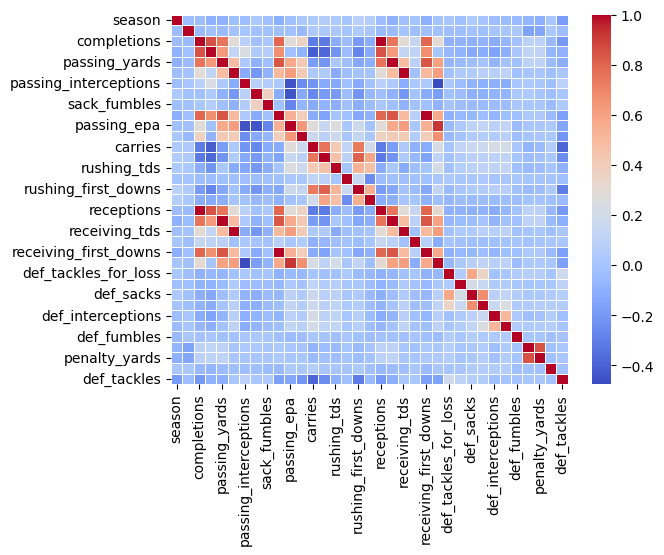

In [53]:
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.show()

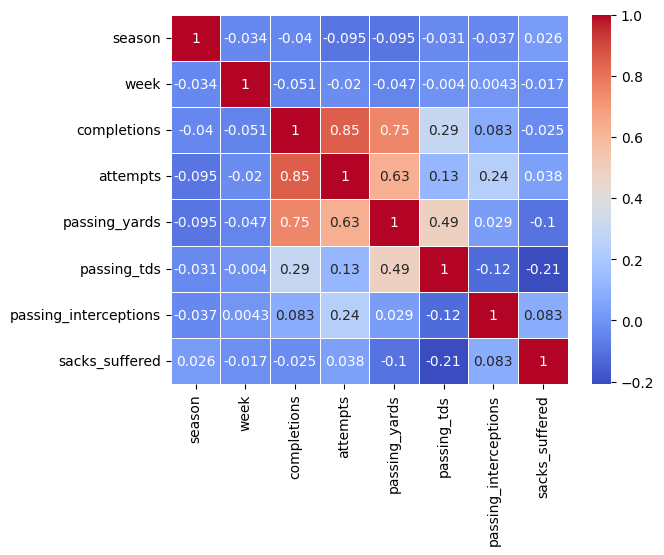

In [54]:
sns.heatmap(corr1, cmap='coolwarm', linewidths=0.5, annot=True)
plt.show()

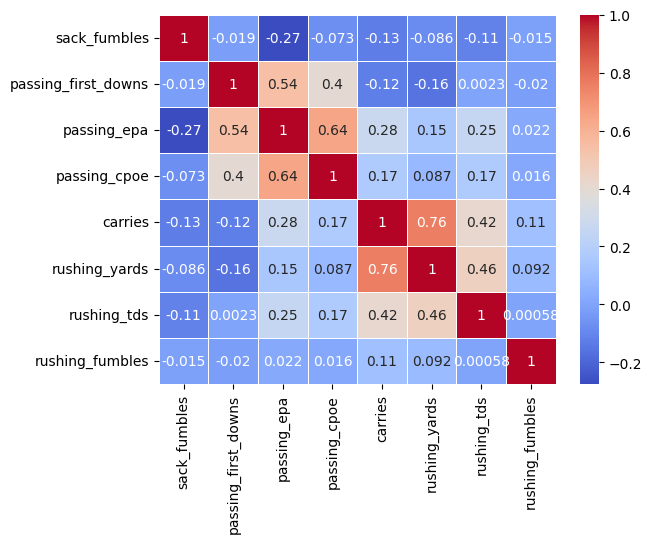

In [55]:
sns.heatmap(corr2, cmap='coolwarm', linewidths=0.5, annot=True)
plt.show()

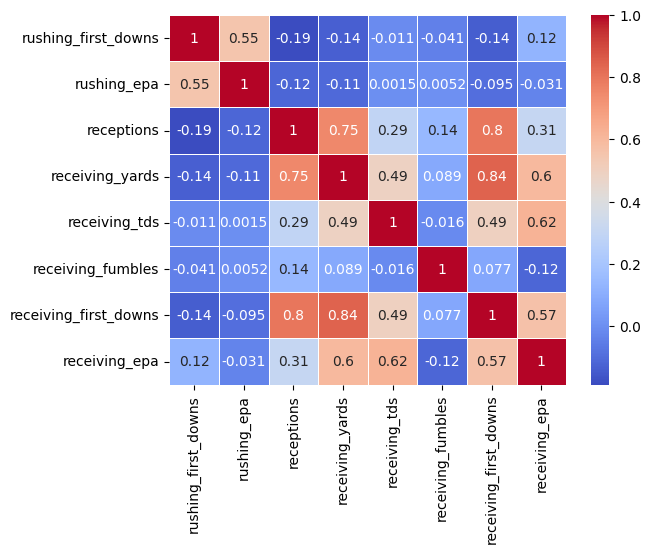

In [56]:
sns.heatmap(corr3, cmap='coolwarm', linewidths=0.5, annot=True)
plt.show()

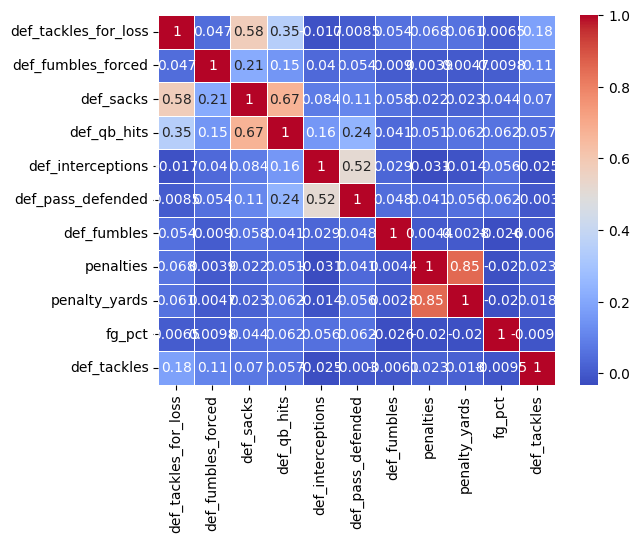

In [57]:
sns.heatmap(corr4, cmap='coolwarm', linewidths=0.5, annot=True)
plt.show()